In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [8]:
data = pd.read_csv('heart.csv')

In [34]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.shape

(303, 14)

In [12]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [15]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [16]:
df = data.copy()

In [17]:
X = df.drop('output', axis=1)
y = df['output']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.fit(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression(max_iter=300)
logmodel.fit(X_train, y_train)

log_pred = logmodel.predict(X_test)

print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [21]:
from sklearn.linear_model import LogisticRegressionCV

lr_l2 = LogisticRegressionCV(Cs=20, cv=4, penalty='l2').fit(X_train, y_train)

l2_pred = lr_l2.predict(X_test)

print(confusion_matrix(y_test, l2_pred))
print(classification_report(y_test, l2_pred))

[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Train and fit a KNeighbors model on the training set (K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict values for the testing data
knn_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[25 16]
 [18 32]]
              precision    recall  f1-score   support

           0       0.58      0.61      0.60        41
           1       0.67      0.64      0.65        50

    accuracy                           0.63        91
   macro avg       0.62      0.62      0.62        91
weighted avg       0.63      0.63      0.63        91



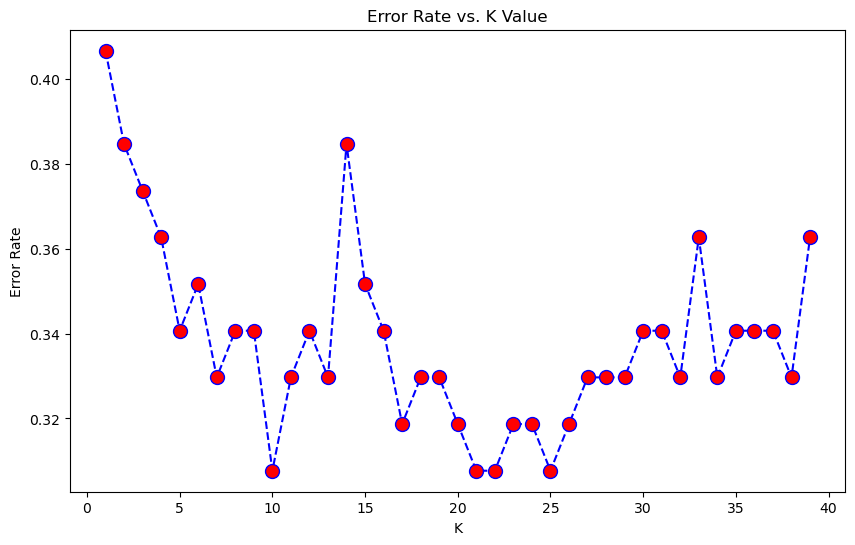

In [23]:
# Initialize an empty list to store error rates
error_rate = []

# Loop through different values of K
for i in range(1, 40):
    # Create a KNN classifier with the current value of K
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    pred_i = knn.predict(X_test)
    
    # Calculate the error rate and append it to the list
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rates against the K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [43]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[28 13]
 [15 35]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        41
           1       0.73      0.70      0.71        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.69      0.69      0.69        91



In [25]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train.values.ravel())

svc_pred = svc.predict(X_test)

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[19 22]
 [ 5 45]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91



In [27]:
from sklearn.model_selection import GridSearchCV

# Define the grid of parameters to search
params_grid = {
    'C': [0.05, 0.1, 0.5, 1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

# Create an SVC model
model = SVC()

# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)

# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'C': 0.5, 'kernel': 'rbf'}

In [44]:
# Retraining an SVC model with the best parameters
best_svc = SVC(C=0.5, kernel='rbf')
best_svc.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
svc_pred = best_svc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[ 8 33]
 [ 2 48]]
              precision    recall  f1-score   support

           0       0.80      0.20      0.31        41
           1       0.59      0.96      0.73        50

    accuracy                           0.62        91
   macro avg       0.70      0.58      0.52        91
weighted avg       0.69      0.62      0.54        91



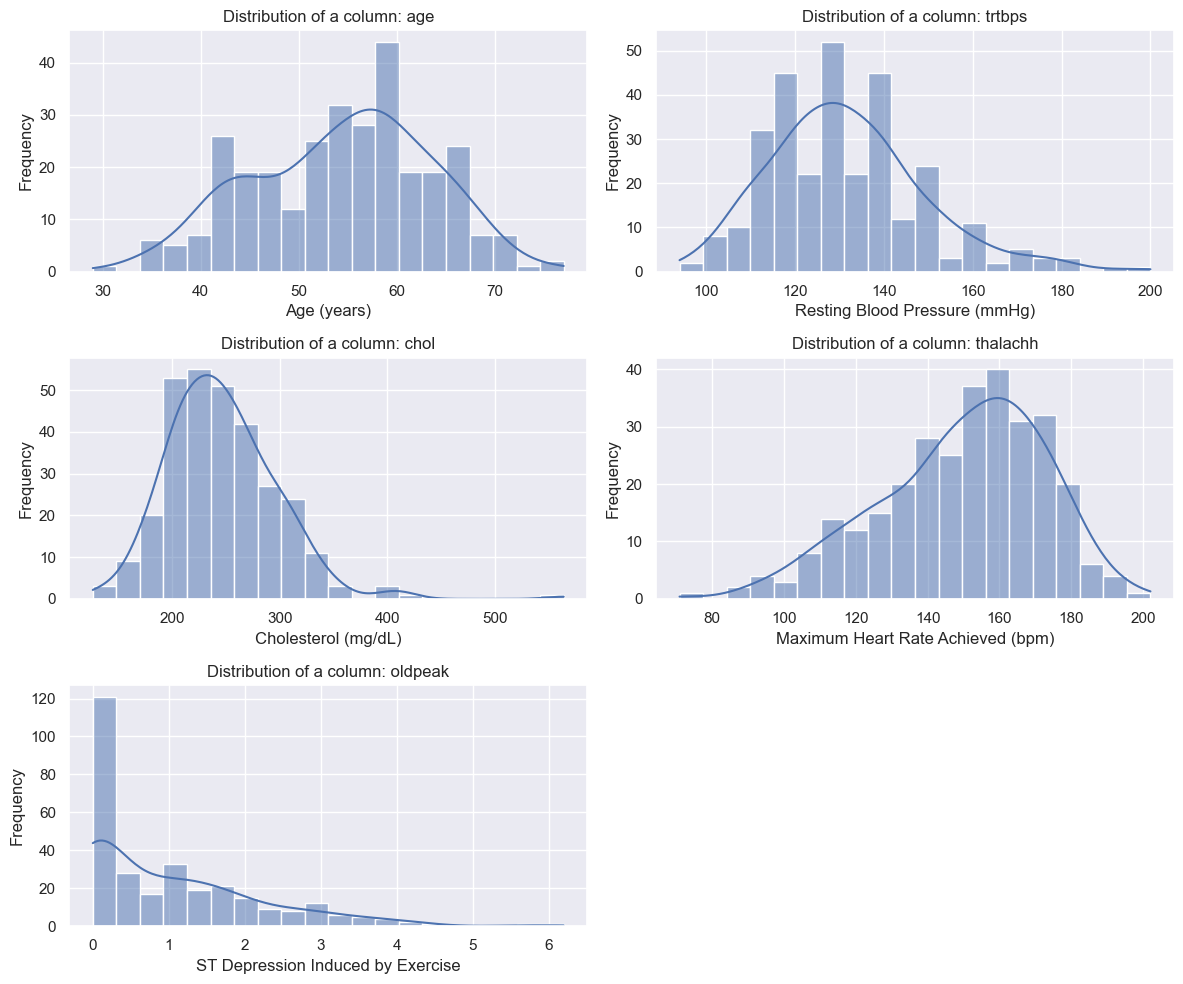

In [29]:
sns.set_theme()

num_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
labels = ['Age (years)', 'Resting Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 
          'Maximum Heart Rate Achieved (bpm)', 'ST Depression Induced by Exercise']

# Set up the plot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution
for i, (column, label) in enumerate(zip(num_columns, labels)):
    # Plotting distribution using seaborn's displot function
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(label)  # Set x-axis label
    axes[i].set_ylabel('Frequency')  # Set y-axis label
    axes[i].set_title(f'Distribution of a column: {column}') # Add title

# Turn off the last axis
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

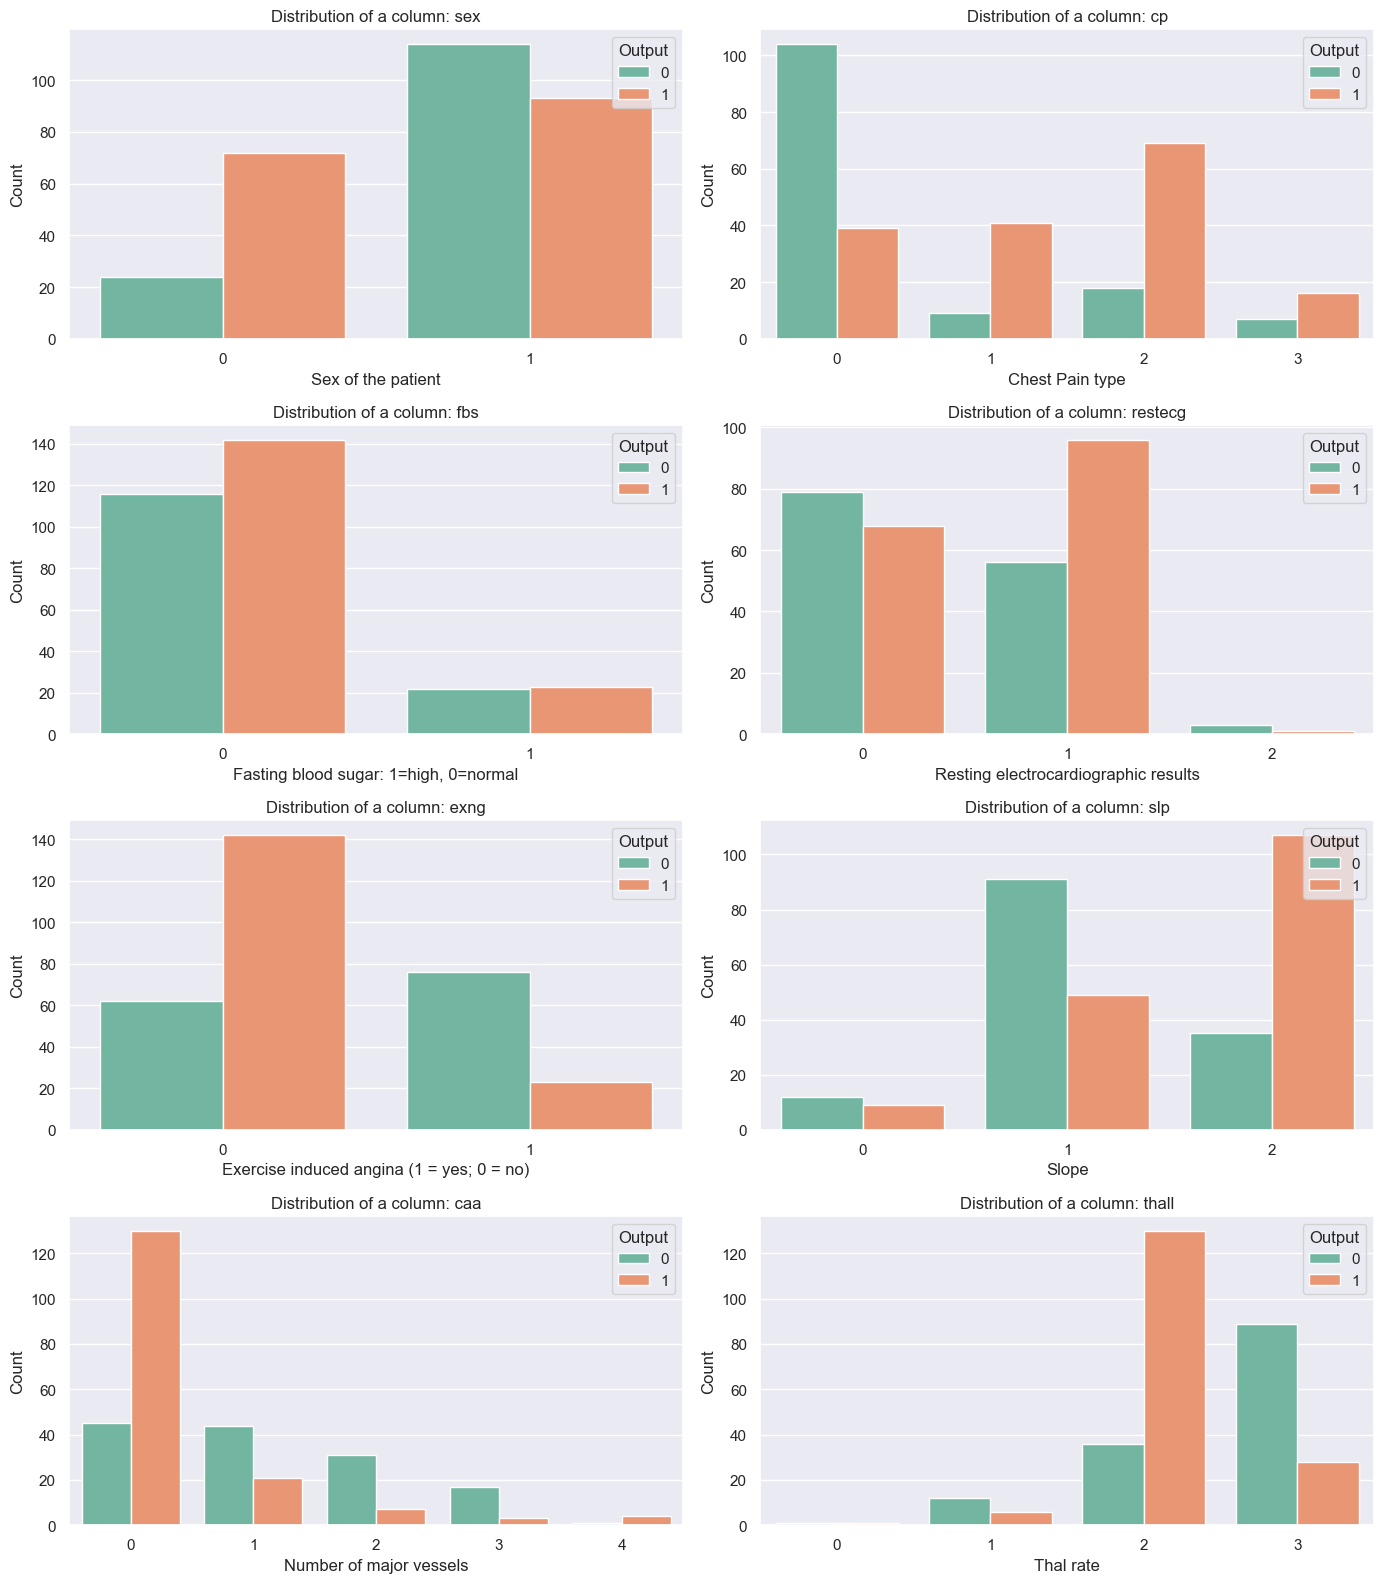

In [30]:
categ_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
labels = ['Sex of the patient', 'Chest Pain type', 'Fasting blood sugar: 1=high, 0=normal', 
          'Resting electrocardiographic results', 'Exercise induced angina (1 = yes; 0 = no)',
          'Slope', 'Number of major vessels', 'Thal rate']

# Set up the plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution
for i, (column, label) in enumerate(zip(categ_columns, labels)):
    # Plotting distribution using seaborn's countplot function
    sns.countplot(data=df, x=column, hue='output', ax=axes[i], palette='Set2')
    axes[i].set_xlabel(label)  # Set x-axis label
    axes[i].set_ylabel('Count')  # Set y-axis label
    axes[i].legend(title='Output', loc='upper right')  # Add legend
    axes[i].set_title(f'Distribution of a column: {column}') # Add title

# Adjust layout
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

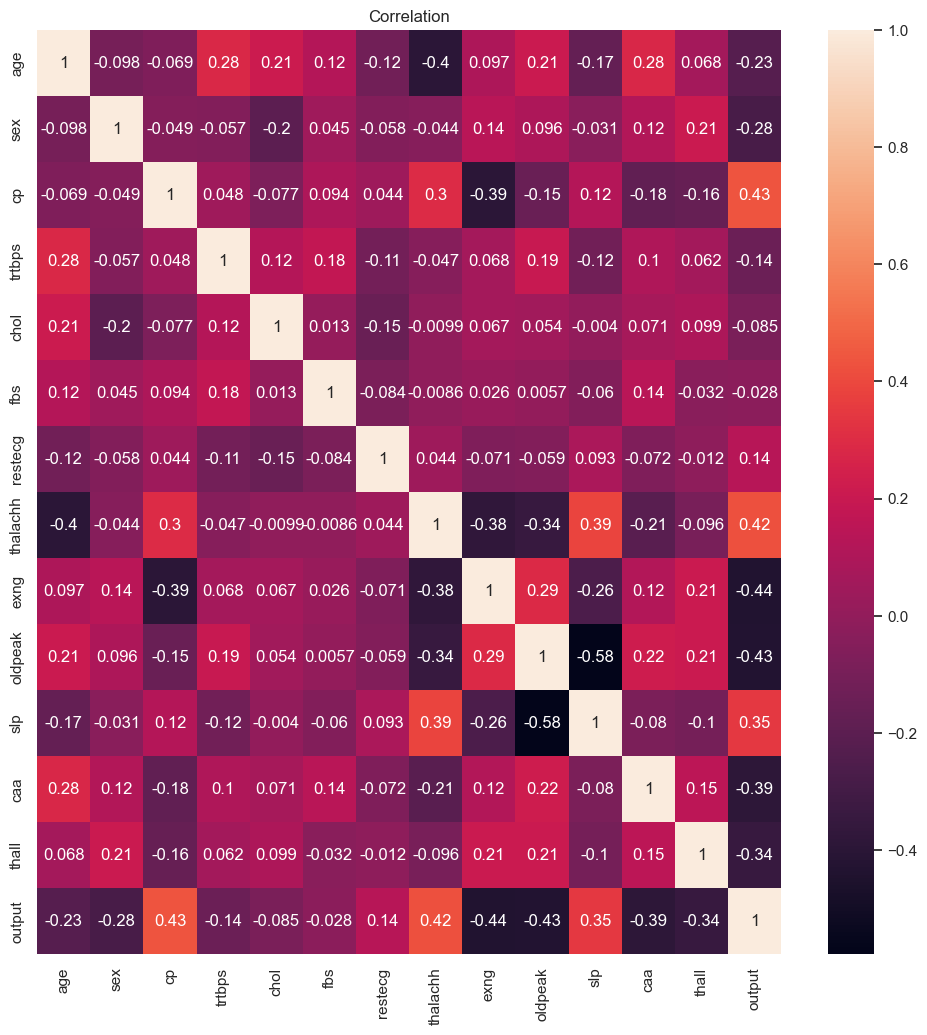

In [40]:
plt.figure(figsize=(12,12))

corr_matrix = df.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot = True)

plt.title('Correlation')

plt.show